In [29]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
os.chdir(r"E:\Projects\Kaggle Challenges\ICR - Identifying Age-Related Conditions\Outputs")
print(os.getcwd())

E:\Projects\Kaggle Challenges\ICR - Identifying Age-Related Conditions\Outputs


In [3]:
data = pd.read_csv(r"E:\Projects\Kaggle Challenges\ICR - Identifying Age-Related Conditions\Data\train.csv")
greeks = pd.read_csv(r"E:\Projects\Kaggle Challenges\ICR - Identifying Age-Related Conditions\Data\greeks.csv")

In [54]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


# Data Explorations and Testing

In this notebook I will conduct some EDA to explore the relationship between greeks and the conditions, explore the idea of training a model that predicts conditions independantly vs altogether. I will also documents thought of style of model to use, some might include:

1. Logistic Regression

2. XGBoost Trees

3. Random Forest

4. Forest of combination of the above three methods

5. Seperate into 2 models: easily predicted case vs challenging "edge" case

In [4]:
data.loc[:, data.columns!= "Class"]

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,8.026928,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622


In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import graphviz

In [6]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'  

In [7]:
#Turn DF into one hot encoded vector
data_transformed =pd.concat([data[["Class"]],pd.get_dummies(data[["EJ"]]), data.loc[:, (~data.columns.isin([ "Class", "Id", "EJ"]))].astype("float")], axis = 1).fillna(0)


In [8]:
#To start off: a simple tree model on just the train data 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


train_X, val_X, train_y, val_y = train_test_split(data_transformed.loc[:, (~data_transformed.columns.isin([ "Class", "Id"]))], data_transformed.loc[:, data_transformed.columns.isin([ "Class"])], test_size = 0.3,  random_state=1)

print((train_X.shape), (val_X.shape), (train_y.shape), (val_y.shape))

(431, 57) (186, 57) (431, 1) (186, 1)


### Logistic Regression

So the optimizer failed to converge, but it returned a good enough validation error non the less. 

One thing I realized is for regression methods I need to be more aware of multicoliniearity, which might cause this to happen, or I might be getting a linearly seperatable boundaries already. If latter is the case, then I won't get a definite unique decision boundary

In [9]:
from sklearn.linear_model import LogisticRegression

model_LogR = LogisticRegression(random_state= 1).fit(train_X, train_y)
y_hat = model_LogR.predict(val_X)

print("Accuracy:",metrics.accuracy_score(y_hat, val_y))

Accuracy: 0.8602150537634409


c:\Users\Achinesedude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Achinesedude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

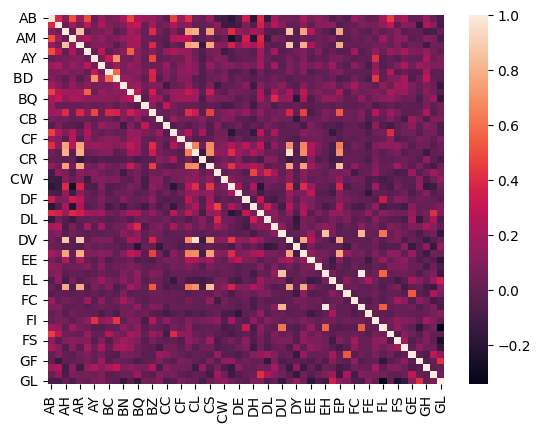

In [30]:
#One way to test for Multicolinearity is VIF (variation inflation factor), but I prefer the good old correlation matrix :)

#def corr_calc(df, i, j):
"""
    Helper Function to return the correlation of 2 columns

    Inputs:
    - df: dataframe of interest
    - i: feature index i
    - j: feature index j

    Outputs:
    - corr: correlation coefficient of above columns
"""
    #corr = 
    #return corr

corr_matrix = train_X.loc[:,~ train_X.columns.isin(["EJ_A", "EJ_B"])].astype("float").corr()

corr_matrix_long = corr_matrix.reset_index()
corr_matrix_long = corr_matrix_long.melt(id_vars = 'index', value_vars = corr_matrix.columns).query('index != variable')


sns.heatmap(corr_matrix)


In [42]:
corr_matrix_long.T

,1,2,3,4,5,6,7,8,9,10,...,3014,3015,3016,3017,3018,3019,3020,3021,3022,3023
index,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,...,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI
variable,AB,AB,AB,AB,AB,AB,AB,AB,AB,AB,...,GL,GL,GL,GL,GL,GL,GL,GL,GL,GL
value,0.386576,0.101636,0.501653,0.162117,0.499827,0.011524,0.16115,0.060338,0.099366,0.209768,...,0.114291,-0.002359,-0.344091,-0.006082,-0.243285,-0.150583,0.118356,0.420499,0.010375,0.05547


In [47]:
zip(*corr_matrix_long.values.T)

In [51]:
# most correlated 20 pairs:
# by arranging their correlation descending order (since the most negative value was -0.2) 
# create sets of these pairs to dedupe, then turn them back into lists to take the first 20

list(sorted(set(zip(*corr_matrix_long[["value", "index", "variable"]].values.T)), reverse = True ))[:20]


[(0.9901730942770068, 'FD ', 'EH'),
 (0.9901730942770068, 'EH', 'FD '),
 (0.9555699581758936, 'DV', 'CL'),
 (0.9555699581758936, 'CL', 'DV'),
 (0.8705031093582836, 'DV', 'AR'),
 (0.8705031093582836, 'AR', 'DV'),
 (0.8641187248864458, 'DV', 'AH'),
 (0.8641187248864458, 'AH', 'DV'),
 (0.8569005771355771, 'EH', 'DU'),
 (0.8569005771355771, 'DU', 'EH'),
 (0.8470282667779836, 'AR', 'AH'),
 (0.8470282667779836, 'AH', 'AR'),
 (0.8408995920798491, 'EP', 'CS'),
 (0.8408995920798491, 'CS', 'EP'),
 (0.8115859744857656, 'FD ', 'DU'),
 (0.8115859744857656, 'DU', 'FD '),
 (0.793005149060761, 'CL', 'AH'),
 (0.793005149060761, 'AH', 'CL'),
 (0.788734077806594, 'EB', 'AR'),
 (0.788734077806594, 'AR', 'EB')]

 Conclusion: although the regression yield a decent validation error, we see that there are a good amount of multicolinearity that we need to address we also have a relatively small sample size with a lot of features, not exacly sure Logistic regression would be a good idea. 

 On top of that, chances are that the multicolinearity is causing the gradient descent to diverge since the optimizer is swapping between 2 highly correlated coefficients

### Tree

In [11]:
#kept using gini for loss due to probably not worth the complexity and run time to use entropy 
model = DecisionTreeClassifier()
model = model.fit(train_X, train_y)
y_hat = model.predict(val_X)

print("Accuracy:",metrics.accuracy_score(y_hat, val_y))

Accuracy: 0.9032258064516129


In [13]:
for i in range(8):
    model = DecisionTreeClassifier(max_depth= i + 1)
    model = model.fit(train_X, train_y)
    y_hat = model.predict(val_X)

    print("Accuracy:",i, metrics.accuracy_score(y_hat, val_y))

Accuracy: 0 0.8709677419354839
Accuracy: 1 0.8763440860215054
Accuracy: 2 0.8817204301075269
Accuracy: 3 0.8709677419354839
Accuracy: 4 0.8870967741935484
Accuracy: 5 0.8817204301075269
Accuracy: 6 0.9086021505376344
Accuracy: 7 0.8709677419354839


In [18]:
#see basic tree with gini.PNG in Ouputs folder
features = train_X.columns
class_names = ["1", "0"]

tree_data = tree.export_graphviz(model, out_file=None,
                                feature_names=features,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)


graph = graphviz.Source(tree_data)
graph.render("decision_tree")
graph.view()

'decision_tree.pdf'

OK seems like it might be possible to seperate the 2 into almost distinct decision boundaries (or I might overfitted, chance is low), but just realized we need to compute a probability for each row for a return file, I am also risking overfitting due to not stopping the tree at all. So maybe trees won't satisfy this ask. one way to do it is using a random forest or bagging, or extreme ensemble methods
 

In [22]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state= 1)
model_ada = clf.fit(train_X, train_y)
y_hat_ada = model_ada.predict(val_X)
y_hat_ada_prob = model_ada.predict_proba(val_X)

print("Accuracy:",metrics.accuracy_score(val_y, y_hat_ada))

c:\Users\Achinesedude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9354838709677419


In [34]:
#test set: 

test_x = pd.read_csv(r"E:\Projects\Kaggle Challenges\ICR - Identifying Age-Related Conditions\Data\test.csv")
test_x.set_index("Id")
EJ_B = pd.Series(data = [["0"]*5])
test_x_transformed =pd.concat([pd.get_dummies(test_x[["EJ"]]),EJ_B ,test_x.loc[:, (~test_x.columns.isin([ "Class", "Id", "EJ"]))].astype("float")], axis = 1).fillna(0)
#test_x_transformed["EJ_B"] = 0
test_y_ada  = model_ada.predict_proba(test_x_transformed)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

### Bagged Forest

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier